#### **Import Libraries**

In [6]:
from pathlib import Path
import os 
import jax 
import jax.numpy as jnp 

#### **Set Up Data Paths**

In [16]:
github_folder = str(Path(os.getcwd()).parent.parent.absolute())
paper_link = github_folder + "/rfp_paper/figures/simulations/"
print(github_folder, paper_link)

/Users/patrickpower/Documents/GitHub /Users/patrickpower/Documents/GitHub/rfp_paper/figures/simulations/


#### **Set Up Plotting**

In [17]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-dark-palette')

from matplotlib import font_manager 
locations = github_folder + '/rfp/styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"

/Users/patrickpower/Documents/GitHub/rfp/styles/Newsreader
/Users/patrickpower/Documents/GitHub/rfp/styles/Newsreader/static/Newsreader_24pt/Newsreader_24pt-Medium.ttf


/var/folders/yl/r206rt_11977v3zys5vb9ffw0000gn/T/ipykernel_99588/2235067132.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


#### **Utility Functions**

In [21]:
def cef(x):
  """Conditional Expectation Function"""
  return x**3                                                                                 # x**3 is the CEF

def sample(key):
  """Sample from the data generating process"""
  subkey1, subkey2, subkey3 = jax.random.split(key, 3)                                        # Split key          
  x = jax.random.uniform(subkey1, minval=-3., maxval=3.)                                      # Covariate
  d = jax.random.bernoulli(subkey2, jax.nn.sigmoid(x))                                        # Treatment
  y = x**3  + 0.2*jax.random.normal(subkey3)                                                  # Outcome
  return y, x, d                                                                              # Return outcome, covariate, treatment

def estimate(key):
  """Estimate the Average Treatment Effect"""
  ys, xs, ds = jax.vmap(sample)(jax.random.split(key, 500))                                   # Batch of 500 samples
  ys, xs, ds = jnp.reshape(ys, (-1,1)), jnp.reshape(xs, (-1,1)), jnp.reshape(ds, (-1,1))      # Reshape to 2D
  regs = jnp.hstack((ds, jnp.ones_like(ds), xs))                                              # Regressors
  coef = jnp.linalg.lstsq(regs, ys)[0][0]                                                     # OLS           
  return coef                                                                                 # Return coefficient  

##### **Simulate**

In [22]:
estimates = jax.vmap(estimate)(jax.random.split(jax.random.PRNGKey(0), 20000)).reshape(-1,)
normalized_estimates = estimates/jnp.std(estimates)

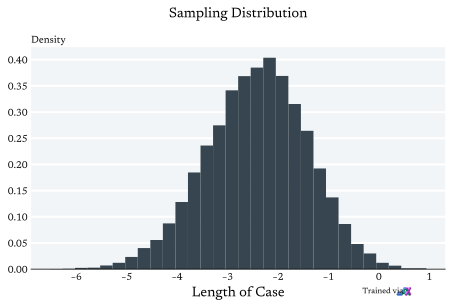

In [45]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)
for key in 'left', 'right', 'top':
  ax.spines[key].set_visible(False)
ax.set_title('Sampling Distribution', size=14, loc='center', pad=30)
subtitle = 'Density'
ax.text(0., 1.02, s=subtitle, transform=ax.transAxes)
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(length=0)
ax.set_xlabel('Length of Case', size=14)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.hist(normalized_estimates, color='#36454F', bins=30, density=True)
# load the image
img_path = github_folder + '/rfp/jax_img.png'
img = plt.imread(img_path)

# create an OffsetImage object with the image
imagebox = OffsetImage(img, zoom=0.05)

# create the annotation with the OffsetImage object
xy = (0.95, - 0.1)
text = 'Trained via'
ann = AnnotationBbox(imagebox, xy, frameon=False,
                     xycoords='axes fraction')

# add the annotation to the axis
ax.add_artist(ann)

# set the text for the annotation
ax.annotate(text, xy=(0.85, -0.1), xycoords='axes fraction',
            fontsize=8, color='black', ha='left', va='center')
#fig.savefig(paper_link + 'hist_case_length.png', format='png')
plt.show()

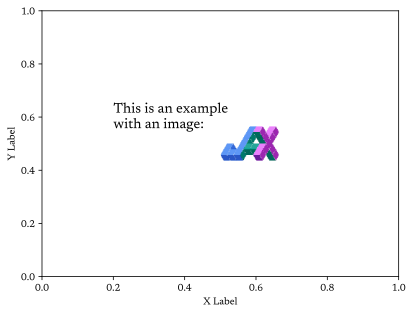

In [30]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# create a figure and axis
fig, ax = plt.subplots()

# load the image
img_path = github_folder + '/rfp/jax_img.png'
img = plt.imread(img_path)

# create an OffsetImage object with the image
imagebox = OffsetImage(img, zoom=0.2)

# create the annotation with the OffsetImage object
xy = (0.5, 0.5)
text = 'This is an example\nwith an image:'
ann = AnnotationBbox(imagebox, xy, frameon=False,
                     xycoords='axes fraction', box_alignment=(0, 0.5))

# add the annotation to the axis
ax.add_artist(ann)

# set the text for the annotation
ax.annotate(text, xy=(0.2, 0.6), xycoords='axes fraction',
            fontsize=14, color='black', ha='left', va='center')

# set the axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# show the plot
plt.show()


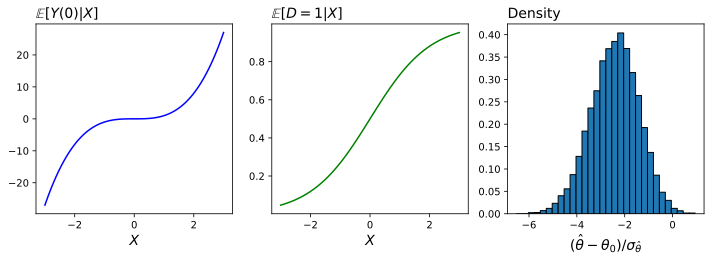

In [17]:
xs = jnp.linspace(-3., 3., 100)
ys = cef(xs)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=False, dpi=True, figsize=(12,3.5))
ax1.plot(xs, ys, color='blue')
ax1.set_title(r'$\mathbb{E}[Y(0)|X]$', loc='left', size=14)
ax1.set_xlabel(r'$X$', size=14)
ys = jax.vmap(jax.nn.sigmoid)(xs)
ax2.plot(xs, ys, color='green')
ax2.set_title(r'$\mathbb{E}[D=1|X]$', loc='left', size=14)
ax2.set_xlabel(r'$X$', size=14)
ax3.hist(normalized_estimates, edgecolor='black', bins=30, density=True)
ax3.set_title('Density', loc='left', size=14)
ax3.set_xlabel(r'$(\hat{\theta} - \theta_0)/ \sigma_{\hat{\theta}}$', size=14)
plt.show()